## Prediction of Parkinson's Disease

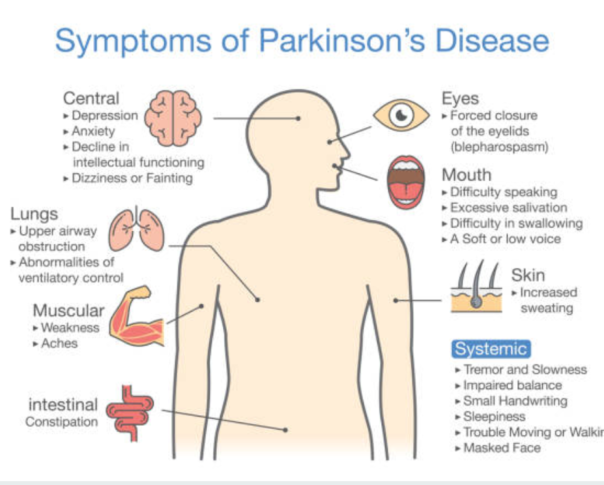

In [18]:
from IPython.display import Image
Image("Parkinson's Disease Image.png")

#### Problem Statement

Detecting Parkinson’s Disease – Python Machine Learning Project
What is Parkinson’s Disease?
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness.This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

What is XGBoost?
XGBoost is a new Machine Learning algorithm designed with speed and performance in mind. XGBoost stands for eXtreme Gradient Boosting and is based on decision trees. In this project, we will import the XGBClassifier from the xgboost library; this is an implementation of the scikit-learn API for XGBoost classification.

Detecting Parkinson’s Disease with XGBoost – Objective
To build a model to accurately detect the presence of Parkinson’s disease in an individual.

Detecting Parkinson’s Disease with XGBoost – About the Python Machine Learning Project
In this Python machine learning project, using the Python libraries scikit-learn, numpy, pandas, and xgboost, we will build a model using an XGBClassifier. We’ll load the data, get the features and labels, scale the features, then split the dataset, build an XGBClassifier, and then calculate the accuracy of our model.

Dataset for Python Machine Learning Project
You’ll need the UCI ML Parkinsons dataset for this; you can download it here. The dataset has 24 columns and 195 records and is only 39.7 KB.

Prerequisites
You’ll need to install the following libraries with pip:

In [1]:
pip install numpy pandas sklearn xgboost

Note: you may need to restart the kernel to use updated packages.


This will open a new JupyterLab window in your browser. Here, you will create a new console and type in your code, then press Shift+Enter to execute one or more lines at a time.

Steps for Detecting Parkinson’s Disease with XGBoost
Below are some steps required to practice Python Machine Learning Project –

##### Make necessary imports:



In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Now, let’s load the data into a DataFrame 

In [2]:
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Get the features and labels from the DataFrame (dataset). The features are all the columns except ‘status’, and the labels are those in the ‘status’ column.

In [3]:
features=df.loc[:,df.columns!='status'].values[:,1:]#Get the features and labels

labels=df.loc[:,'status'].values

The ‘status’ column has values 0 and 1 as labels; let’s get the counts of these labels for both- 0 and 1.

In [4]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])


147 48


We have 147 ones and 48 zeros in the status column in our dataset.

Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [5]:
scaler=MinMaxScaler((-1,1))#Scale the features to between -1 and 1
x=scaler.fit_transform(features)
y=labels

Now, split the dataset into training and testing sets keeping 20% of the data for testing.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

Initialize an XGBClassifier and train the model. This classifies using eXtreme Gradient Boosting- using gradient boosting algorithms for modern data science problems. It falls under the category of Ensemble Learning in ML, where we train and predict using many models to produce one superior output.
Train the model

In [15]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

We will generate y_pred (predicted values for x_test) and calculate the accuracy for the model.

In [16]:
y_pred=model.predict(x_test)

Calculate the accuracy


In [17]:
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


#### Summary
XGboost algorithm was used in this project resulting in an accuracy of 94.87%, which is great considering that there is no model complexity involve in building the model.